Sales Analysis Using Python

Import necessary Libraries

In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Marge all the sales data into a single csv file

In [2]:
files = [file for file in os.listdir("E:/dekstop moved ap/Data set/sales_analysis")]

df = pd.DataFrame()
for file in files:
    single_df = pd.read_csv("E:/dekstop moved ap/Data set/sales_analysis/" + file)
    df = pd.concat([single_df , df])

df.to_csv("E:/dekstop moved ap/Data set/sales_analysis/all_month_data.csv" , index=False)


Read the new file


In [3]:
df = pd.read_csv("E:/dekstop moved ap/Data set/sales_analysis/all_month_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


Data Cleaning

In [4]:
print(df.shape)
print(df.isnull().sum())

(186850, 6)
Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


Droping the missing Values and duplicated valuse

In [5]:
df.dropna(inplace=True)
df.isnull().sum()
df.shape

(186305, 6)

In [6]:
df = df[df['Order ID'] != 'Order ID']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [7]:
df.duplicated().sum()

264

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
df.shape

(185686, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185686 non-null  object
 1   Product           185686 non-null  object
 2   Quantity Ordered  185686 non-null  object
 3   Price Each        185686 non-null  object
 4   Order Date        185686 non-null  object
 5   Purchase Address  185686 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [11]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')
df['Price Each'] = df['Price Each'].astype('float32')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  object 
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int32  
 3   Price Each        185686 non-null  float32
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
dtypes: float32(1), int32(1), object(4)
memory usage: 8.5+ MB


Add a month column

In [13]:
df['Month'] = df['Order Date'].str[0:2].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.840000,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.950000,09/29/19 10:19,"511 8th St, Austin, TX 73301",9
2,248153,USB-C Charging Cable,1,11.950000,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9
3,248154,27in FHD Monitor,1,149.990005,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9
4,248155,USB-C Charging Cable,1,11.950000,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9


Add a sales column

In [14]:
df['sales'] = (df['Quantity Ordered'] * df['Price Each'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,248151,AA Batteries (4-pack),4,3.840000,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.360000
1,248152,USB-C Charging Cable,2,11.950000,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.900000
2,248153,USB-C Charging Cable,1,11.950000,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.950000
3,248154,27in FHD Monitor,1,149.990005,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.990005
4,248155,USB-C Charging Cable,1,11.950000,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.950000


Question 1 : What was the best month for sale ? How much was earned that month ?

In [15]:
total_sales = df.groupby('Month').sum()

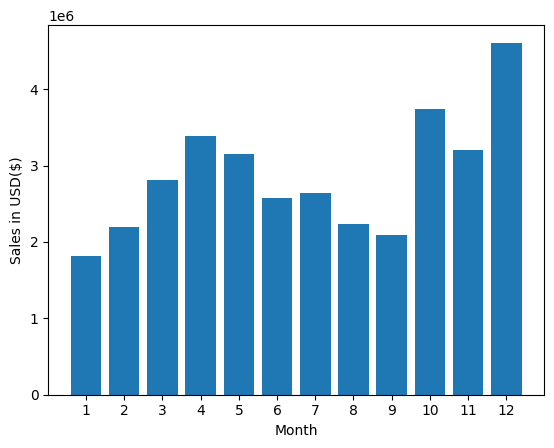

In [16]:
month = range(1,13)
plt.bar(month , total_sales['sales'])
plt.xticks(month)
plt.xlabel('Month')
plt.ylabel('Sales in USD($)')
plt.show()

In [17]:
df.groupby('Month').sum()['sales'].max()

4608295.676124334

Ans 1 : December was the best month for sale and the amount of sale was 4608295.676124334 $

Question 2: What city had the heighest number of sales?

In [18]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,248151,AA Batteries (4-pack),4,3.840000,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.360000
1,248152,USB-C Charging Cable,2,11.950000,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.900000
2,248153,USB-C Charging Cable,1,11.950000,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.950000
3,248154,27in FHD Monitor,1,149.990005,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.990005
4,248155,USB-C Charging Cable,1,11.950000,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.950000


In [19]:
def city(x):
    return x.split(',')[1]
def state(x):
    return x.split(',')[2].split(' ')[1]
df['city']=df['Purchase Address'].apply(lambda x:f"{city(x)} ({state(x)})")

In [20]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,248151,AA Batteries (4-pack),4,3.840000,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.360000,Los Angeles (CA)
1,248152,USB-C Charging Cable,2,11.950000,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.900000,Austin (TX)
2,248153,USB-C Charging Cable,1,11.950000,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.950000,Los Angeles (CA)
3,248154,27in FHD Monitor,1,149.990005,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.990005,Seattle (WA)
4,248155,USB-C Charging Cable,1,11.950000,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.950000,Atlanta (GA)


In [21]:
total_sales_by_city = df.groupby(['city']).sum()

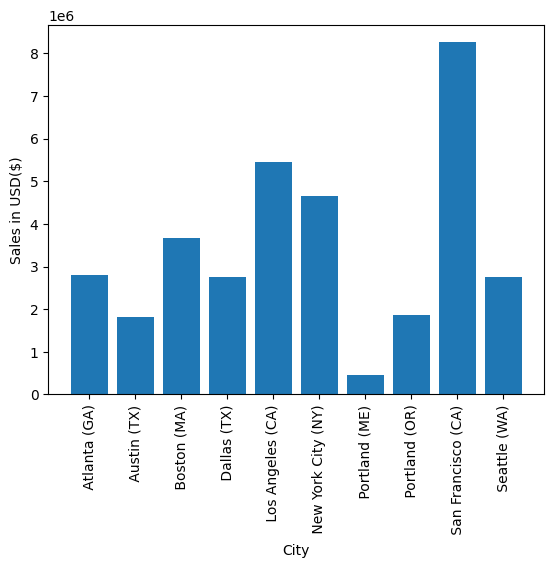

In [22]:
cityy = [city for city,df in df.groupby('city')]  
plt.bar(cityy , total_sales_by_city['sales'])
plt.xticks(cityy,rotation = 90)
plt.xlabel('City')
plt.ylabel('Sales in USD($)')
plt.show()

In [23]:
df.groupby('city').sum()['sales'].max()

8254743.509192228

Answer 2: San Francisco (CA) had the highest number of sales and the value was 8254743.509192228 $

Question 3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [24]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,248151,AA Batteries (4-pack),4,3.840000,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.360000,Los Angeles (CA)
1,248152,USB-C Charging Cable,2,11.950000,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.900000,Austin (TX)
2,248153,USB-C Charging Cable,1,11.950000,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.950000,Los Angeles (CA)
3,248154,27in FHD Monitor,1,149.990005,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.990005,Seattle (WA)
4,248155,USB-C Charging Cable,1,11.950000,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.950000,Atlanta (GA)


In [25]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\USER\AppData\Local\Temp\ipykernel_8576\3072535395.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [26]:
df['order hour'] = df['Order Date'].dt.hour
df['order minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,order hour,order minute
0,248151,AA Batteries (4-pack),4,3.840000,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.360000,Los Angeles (CA),14,44
1,248152,USB-C Charging Cable,2,11.950000,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.900000,Austin (TX),10,19
2,248153,USB-C Charging Cable,1,11.950000,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.950000,Los Angeles (CA),17,48
3,248154,27in FHD Monitor,1,149.990005,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.990005,Seattle (WA),7,52
4,248155,USB-C Charging Cable,1,11.950000,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.950000,Atlanta (GA),19,3


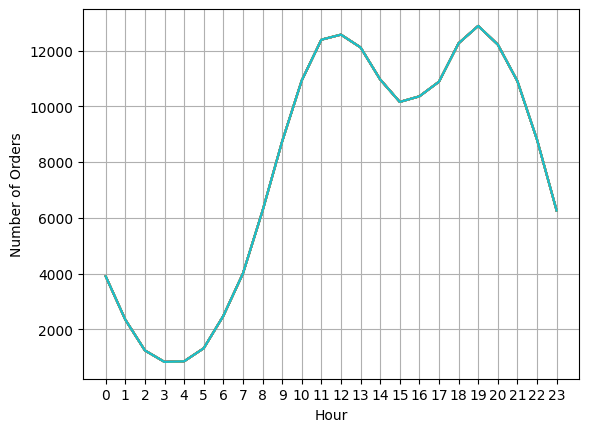

In [27]:
hours = [hour for hour , df in df.groupby('order hour')]
plt.plot(hours, df.groupby('order hour').count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

Answer 3: My recommendation for displaying add is around 11am to 12pm or 7pm

Question 4: What products are most often sold together?

In [28]:
duplicate_df = df[df['Order ID'].duplicated(keep = False)]
duplicate_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,order hour,order minute
60,248210,iPhone,1,700.000000,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,700.000000,San Francisco (CA),10,33
61,248210,Lightning Charging Cable,1,14.950000,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,14.950000,San Francisco (CA),10,33
70,248219,Bose SoundSport Headphones,1,99.989998,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,99.989998,Los Angeles (CA),12,48
71,248219,Google Phone,1,600.000000,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,600.000000,Los Angeles (CA),12,48
117,248265,Vareebadd Phone,1,400.000000,2019-09-24 14:07:00,"939 14th St, San Francisco, CA 94016",9,400.000000,San Francisco (CA),14,7


In [29]:
duplicate_df['Grouped'] = duplicate_df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x)) # transform is like apply mathod
duplicate_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_8576\2500253226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_df['Grouped'] = duplicate_df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x)) # transform is like apply mathod


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,order hour,order minute,Grouped
60,248210,iPhone,1,700.000000,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,700.000000,San Francisco (CA),10,33,"iPhone,Lightning Charging Cable"
61,248210,Lightning Charging Cable,1,14.950000,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,14.950000,San Francisco (CA),10,33,"iPhone,Lightning Charging Cable"
70,248219,Bose SoundSport Headphones,1,99.989998,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,99.989998,Los Angeles (CA),12,48,"Bose SoundSport Headphones,Google Phone"
71,248219,Google Phone,1,600.000000,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,600.000000,Los Angeles (CA),12,48,"Bose SoundSport Headphones,Google Phone"
117,248265,Vareebadd Phone,1,400.000000,2019-09-24 14:07:00,"939 14th St, San Francisco, CA 94016",9,400.000000,San Francisco (CA),14,7,"Vareebadd Phone,Bose SoundSport Headphones"


In [30]:
duplicate_df = duplicate_df[['Order ID' , 'Grouped']].drop_duplicates()
duplicate_df.head()

,Order ID,Grouped
60,248210,"iPhone,Lightning Charging Cable"
70,248219,"Bose SoundSport Headphones,Google Phone"
117,248265,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,"Google Phone,Bose SoundSport Headphones"
183,248329,"Vareebadd Phone,Wired Headphones"


In [31]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in duplicate_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list , 2)))
print("For 2 Grouped Products : \n")
for key , value in count.most_common(10):
    print(key , value)


count = Counter()

for row in duplicate_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list , 3)))
print("\nFor 3 Grouped Products : \n")
for key , value in count.most_common(10):
    print(key , value)




For 2 Grouped Products : 

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92

For 3 Grouped Products : 

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 86
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB

Answer 4: Iphone and Lightning Charging Cable are most often sold together . 

Question 5: What product sold the most ? And what's the reason behind it ?

In [32]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,order hour,order minute
0,248151,AA Batteries (4-pack),4,3.840000,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.360000,Los Angeles (CA),14,44
1,248152,USB-C Charging Cable,2,11.950000,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.900000,Austin (TX),10,19
2,248153,USB-C Charging Cable,1,11.950000,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.950000,Los Angeles (CA),17,48
3,248154,27in FHD Monitor,1,149.990005,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.990005,Seattle (WA),7,52
4,248155,USB-C Charging Cable,1,11.950000,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.950000,Atlanta (GA),19,3


In [33]:
quantity = df.groupby('Product')['Quantity Ordered'].sum().reset_index()
quantity

,Product,Quantity Ordered
0,20in Monitor,4126
1,27in 4K Gaming Monitor,6239
2,27in FHD Monitor,7541
3,34in Ultrawide Monitor,6192
4,AA Batteries (4-pack),27615
5,AAA Batteries (4-pack),30986
6,Apple Airpods Headphones,15637
7,Bose SoundSport Headphones,13430
8,Flatscreen TV,4813
9,Google Phone,5529


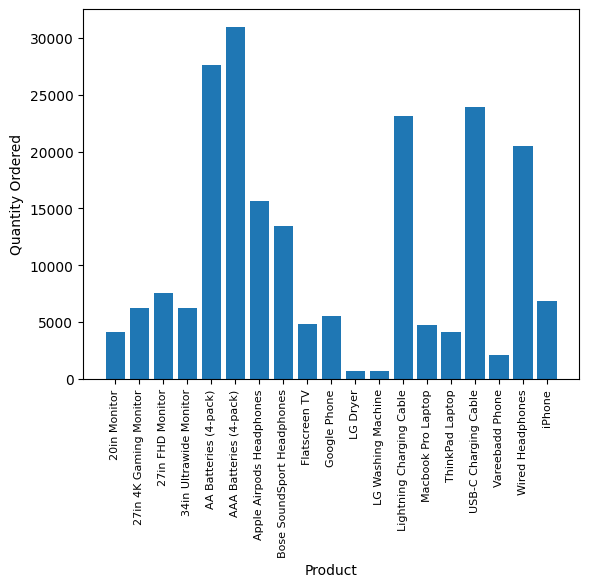

In [34]:
plt.bar(quantity['Product'] , quantity['Quantity Ordered'])
plt.xticks(rotation = 90 , size = 8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

In [35]:
price = df.groupby('Product')['Price Each'].mean().to_frame('mean price')
price

,mean price
Product,
20in Monitor,109.989998
27in 4K Gaming Monitor,389.989990
27in FHD Monitor,149.989990
34in Ultrawide Monitor,379.989990
AA Batteries (4-pack),3.840000
AAA Batteries (4-pack),2.990000
Apple Airpods Headphones,150.000000
Bose SoundSport Headphones,99.989998
Flatscreen TV,300.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_8576\4104505061.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(quantity['Product'] , rotation = 90 , size = 8)


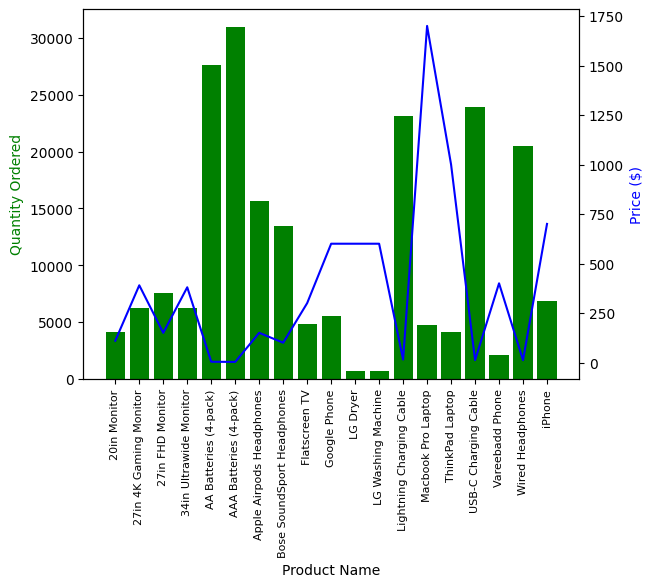

In [36]:
fig , ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(quantity['Product'] , quantity['Quantity Ordered'] , color = 'g')
ax2.plot(quantity['Product'] , price['mean price'] , 'b-')

ax1.set_xticklabels(quantity['Product'] , rotation = 90 , size = 8)
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered' , color = 'g')
ax2.set_ylabel('Price ($)' , color = 'b')

plt.show()

Answer 5 : AAA Batteries (4-pack) was the most sold product because the product was in lower price rather than the Macbook , LG Dryer and Thinkpad Laptop was in higher price . Thats why those product sold less.